# MOVIE EXPLORATORY ANALYSIS

### <span style="color:BLUE"> GROUP MEMBERS:
    1. Annapoorna Chandrashekar Kadur RUID:182002402
    2. Nidhi Mannadiar                RUID:181009378
    3. Karan Kanwal                   RUID:178006681
    4. Aishwarya Kotyankar            RUID:178006683

### <span style="color:Maroon">Our movie dataset consists of about 4000 rows and spanned across 17 columns.

### PROBLEM STATEMENT
* What can we say about the success of a movie before it is released? 
* What are the main contributors to a movie being successful? 
* Are there certain companies that have found a consistent formula?. 
* Can we predict which films have earned the maximum profit in the last five years? 
* What is the genre that makes a movie click?
* Using our dataset we have tried to dig into the above questions with data on the budget, production houses, release dates and revenues, voter average and so on of several thousand films.

In [1]:
%matplotlib inline

import os                                  #importing os
import numpy as np                         #importing package numpy
import pandas as pd                        #importing package pandas
import seaborn as sns                      #importing package seaborn 
import matplotlib.pyplot as plt            #importing package matplotlib 

In [2]:
movies = pd.read_csv('C:/Users/NIDHI/Desktop/Nidhi/Intro to Data Science/Project/tmdb_5000_movies.csv')
                                           #Reads a CSV file as a dataframe

In [3]:
movies                                     #To view dataframe movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,Unnamed: 19
0,74000000,Family,http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",17-06-2015,1156730962,91,Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,NaN
1,165000000,Adventure,http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",05-11-2014,675120017,169,Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,NaN
2,58000000,Action,http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-02-2016,783112979,108,Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,NaN
3,170000000,Action,http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",30-07-2014,773328629,121,Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,NaN
4,150000000,Action,http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",13-05-2015,378858340,120,Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,NaN
5,150000000,Action,http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-06-2015,1513528810,124,Released,The park is open.,Jurassic World,6.5,8662,NaN
6,140000000,Adventure,http://disney.go.com/disneyvideos/liveaction/p...,22,"[{""id"": 911, ""name"": ""exotic island""}, {""id"": ...",en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271.972889,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-07-2003,655011224,143,Released,Prepare to be blown out of the water.,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,NaN
7,170000000,Science Fiction,http://www.dawnofapes.com/,119450,"[{""id"": 3077, ""name"": ""leader""}, {""id"": 4090, ...",en,Dawn of the Planet of the Apes,A group of scientists in San Francisco struggl...,243.791743,"[{""name"": ""Ingenious Media"", ""id"": 290}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",26-06-2014,710644566,130,Released,One last chance for peace.,Dawn of the Planet of the Apes,7.3,4410,NaN
8,125000000,Science Fiction,http://www.thehungergames.movie/,131631,"[{""id"": 836, ""name"": ""resistance""}, {""id"": 445...",en,The Hunger Games: Mockingjay - Part 1,Katniss Everdeen reluctantly becomes the symbo...,206.227151,"[{""name"": ""Lionsgate"", ""id"": 1632}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",18-11-2014,752100229,123

## Data Cleaning
### <span style="color:Maroon">Cleaning data to fill in the missing values, smooth out the noise and correct inconsistencies in our data.

### <span style="color:Green">To calculate missing values

In [4]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()                                   #Calculates sum of null values i.e if rows have null values calculate the sum.
        mis_val_percent = 100 * df.isnull().sum()/len(df)             #Calculates missing value percentage where we divide sum by the total length of the dataframe
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) #We create a missing value table that has columns for missing values and missing value percentage
        mis_val_table_ren_columns = mis_val_table.rename(             #We rename the column names in missing value table
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})    
        return mis_val_table_ren_columns
    
print(missing_values_table(movies))                                   #print the missing values table

                      Missing Values  % of Total Values
budget                             0           0.000000
genres                            28           0.582969
homepage                        3091          64.355611
id                                 0           0.000000
keywords                           0           0.000000
original_language                  0           0.000000
original_title                     0           0.000000
overview                           3           0.062461
popularity                         0           0.000000
production_companies               0           0.000000
production_countries               0           0.000000
release_date                       1           0.020820
revenue                            0           0.000000
runtime                            0           0.000000
status                             0           0.000000
tagline                          844          17.572351
title                              0           0

### <span style="color:Green">Renaming column names

In [5]:
#In order to improve the consistency of data,we rename columns in our dataset to make them more readable.
movies=movies.rename(columns = {'budget':'Budget','genres':'Genres' ,'homepage':'Website'  ,'id':'MovieID',
                'keywords':'Keywords','original_language':'Original_Language',
                'original_title':'Title','overview':'Overview','popularity':'Popularity',
                'production_companies':'Production_Houses','production_countries':'Production_Countries',
                'release_date':'Release_Date', 'revenue':'Revenue','runtime':'Runtime',
                'status':'Movie_Status','tagline':'Tagline','title':'Movie_Name',
                'vote_average':'Average_Vote','vote_count':'Vote_Count'})
movies.head(5)                                                       #Returns the top 5 rows of the frame

,Budget,Genres,Website,MovieID,Keywords,Original_Language,Title,Overview,Popularity,Production_Houses,Production_Countries,Release_Date,Revenue,Runtime,Movie_Status,Tagline,Movie_Name,Average_Vote,Vote_Count,Unnamed: 19
0,74000000,Family,http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",17-06-2015,1156730962,91,Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,NaN
1,165000000,Adventure,http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",05-11-2014,675120017,169,Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,NaN
2,58000000,Action,http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-02-2016,783112979,108,Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,NaN
3,170000000,Action,http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",30-07-2014,773328629,121,Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,NaN
4,150000000,Action,http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",13-05-2015,378858340,120,Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,NaN


### <span style="color:Green">We replace the inconsistencies of various values present in the columns.

In [6]:
s = movies['Production_Houses'].str.replace('{"name": "',"")
r=s.str.replace('[',"")
t=r.str.replace(']',"")
u=t.str.replace('}',"")
v=u.str.replace('", "id":',"")  
w=v.str.replace("\d","")
movies['Production_Houses']=w                

In [7]:
s = movies['Production_Countries'].str.replace('"}'," ")
t=s.str.replace('[',"")
u=t.str.replace(']',"")
v=u.str.replace('{"iso_3166_1": "',"")
x=v.str.replace('", "name": "',"")
movies['Production_Countries']=x

In [8]:
a = movies['Keywords'].str.replace('{"id": ',"")
b=a.str.replace('[',"")
c=b.str.replace(']',"")
d=c.str.replace('"}',"")
e=d.str.replace(', "name": "',"") 
f=e.str.replace("\d","")
movies['Keywords']=f 

In [9]:
movies.head()

,Budget,Genres,Website,MovieID,Keywords,Original_Language,Title,Overview,Popularity,Production_Houses,Production_Countries,Release_Date,Revenue,Runtime,Movie_Status,Tagline,Movie_Name,Average_Vote,Vote_Count,Unnamed: 19
0,74000000,Family,http://www.minionsmovie.com/,211672,"assistant, aftercreditsstinger, duringcreditss...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"Universal Pictures , Illumination Entertainment",USUnited States of America,17-06-2015,1156730962,91,Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,NaN
1,165000000,Adventure,http://www.interstellarmovie.net/,157336,"saving the world, artificial intelligence, fat...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"Paramount Pictures , Legendary Pictures , Warn...","CACanada , USUnited States of America , GBUnit...",05-11-2014,675120017,169,Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,NaN
2,58000000,Action,http://www.foxmovies.com/movies/deadpool,293660,"anti hero, mercenary, marvel comic, superhero,...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"Twentieth Century Fox Film Corporation , Marve...",USUnited States of America,09-02-2016,783112979,108,Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,NaN
3,170000000,Action,http://marvel.com/guardians,118340,"marvel comic, spaceship, space, outer space, o...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"Marvel Studios , Moving Picture Company (MPC) ...","GBUnited Kingdom , USUnited States of America",30-07-2014,773328629,121,Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,NaN
4,150000000,Action,http://www.madmaxmovie.com/,76341,"future, chase, post-apocalyptic, dystopia, aus...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"Village Roadshow Pictures , Kennedy Miller Pro...","AUAustralia , USUnited States of America",13-05-2015,378858340,120,Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,NaN


### <span style="color:Green">Replacing blank or null values with an appropriate message

In [10]:
#Below we handle missing data,as there are certain rows in the Website and Tagline column as missing,we replace these columns
#with values which will enable us to go head with out analysis
movies['Website'].fillna('No Website available', inplace=True)
movies['Tagline'].fillna('No Tagline available', inplace=True)

### <span style="color:Green"> Converting float datatype to integer datatype

In [11]:
#We removie the na values and also convert the columns into suitable data types
movies['Popularity']=movies['Popularity'].fillna(0).astype(np.int64)

In [12]:
movies['Original_Language']=movies['Original_Language'].str.upper()  #Changing the values to uppercase
movies['Release_Date'] = movies['Release_Date'].str.replace('-','/') #Replacing the character '-' with '/'
del movies['Unnamed: 19']                                            #Deleting redundant column 'Unnamed : 19'
movies.head(5)

,Budget,Genres,Website,MovieID,Keywords,Original_Language,Title,Overview,Popularity,Production_Houses,Production_Countries,Release_Date,Revenue,Runtime,Movie_Status,Tagline,Movie_Name,Average_Vote,Vote_Count
0,74000000,Family,http://www.minionsmovie.com/,211672,"assistant, aftercreditsstinger, duringcreditss...",EN,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875,"Universal Pictures , Illumination Entertainment",USUnited States of America,17/06/2015,1156730962,91,Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571
1,165000000,Adventure,http://www.interstellarmovie.net/,157336,"saving the world, artificial intelligence, fat...",EN,Interstellar,Interstellar chronicles the adventures of a gr...,724,"Paramount Pictures , Legendary Pictures , Warn...","CACanada , USUnited States of America , GBUnit...",05/11/2014,675120017,169,Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867
2,58000000,Action,http://www.foxmovies.com/movies/deadpool,293660,"anti hero, mercenary, marvel comic, superhero,...",EN,Deadpool,Deadpool tells the origin story of former Spec...,514,"Twentieth Century Fox Film Corporation , Marve...",USUnited States of America,09/02/2016,783112979,108,Released,Witness the beginning of a happy ending,Deadpool,7.4,10995
3,170000000,Action,http://marvel.com/guardians,118340,"marvel comic, spaceship, space, outer space, o...",EN,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481,"Marvel Studios , Moving Picture Company (MPC) ...","GBUnited Kingdom , USUnited States of America",30/07/2014,773328629,121,Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742
4,150000000,Action,http://www.madmaxmovie.com/,76341,"future, chase, post-apocalyptic, dystopia, aus...",EN,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434,"Village Roadshow Pictures , Kennedy Miller Pro...","AUAustralia , USUnited States of America",13/05/2015,378858340,120,Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427


In [13]:
movies = movies[movies['Revenue'] != 0].dropna()                   #Dropping rows with Revenue values

In [14]:
#Below,we calculate the profit which is the difference between the revenue and budget
movies['Profit']=movies['Revenue'] - movies['Budget']

In [15]:
#We now check whether any of the columns have null values present in them
movies.isnull().sum()

Budget                  0
Genres                  0
Website                 0
MovieID                 0
Keywords                0
Original_Language       0
Title                   0
Overview                0
Popularity              0
Production_Houses       0
Production_Countries    0
Release_Date            0
Revenue                 0
Runtime                 0
Movie_Status            0
Tagline                 0
Movie_Name              0
Average_Vote            0
Vote_Count              0
Profit                  0
dtype: int64

In [16]:
movies.head(5)

,Budget,Genres,Website,MovieID,Keywords,Original_Language,Title,Overview,Popularity,Production_Houses,Production_Countries,Release_Date,Revenue,Runtime,Movie_Status,Tagline,Movie_Name,Average_Vote,Vote_Count,Profit
0,74000000,Family,http://www.minionsmovie.com/,211672,"assistant, aftercreditsstinger, duringcreditss...",EN,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875,"Universal Pictures , Illumination Entertainment",USUnited States of America,17/06/2015,1156730962,91,Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,1082730962
1,165000000,Adventure,http://www.interstellarmovie.net/,157336,"saving the world, artificial intelligence, fat...",EN,Interstellar,Interstellar chronicles the adventures of a gr...,724,"Paramount Pictures , Legendary Pictures , Warn...","CACanada , USUnited States of America , GBUnit...",05/11/2014,675120017,169,Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,510120017
2,58000000,Action,http://www.foxmovies.com/movies/deadpool,293660,"anti hero, mercenary, marvel comic, superhero,...",EN,Deadpool,Deadpool tells the origin story of former Spec...,514,"Twentieth Century Fox Film Corporation , Marve...",USUnited States of America,09/02/2016,783112979,108,Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,725112979
3,170000000,Action,http://marvel.com/guardians,118340,"marvel comic, spaceship, space, outer space, o...",EN,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481,"Marvel Studios , Moving Picture Company (MPC) ...","GBUnited Kingdom , USUnited States of America",30/07/2014,773328629,121,Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,603328629
4,150000000,Action,http://www.madmaxmovie.com/,76341,"future, chase, post-apocalyptic, dystopia, aus...",EN,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434,"Village Roadshow Pictures , Kennedy Miller Pro...","AUAustralia , USUnited States of America",13/05/2015,378858340,120,Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,228858340


### <span style="color:Green"> Below,is a code to count the number of movies which have made a profit over the years

In [17]:
count = []
for value in movies['Profit']:
    num = float(value)
    if num > 0:
        count.append(value)

In [18]:
print(len(count))

2585


In [21]:
d='C:/Users/NIDHI/Desktop/Nidhi/Intro to Data Science/Project/movies.csv'
movies.to_csv(d)

In [21]:
d='C:/Users/NIDHI/Desktop/Nidhi/Intro to Data Science/Project/movies.xls'
movies.to_excel(d)

# Descriptive Analysis

## <span style="color:Orange">which is the most profitable month to release a movie?</span>

### <span style="color:Maroon"> Our first analysis,consists of extrapolating from the dataset,that which month is beneficial for a movie to release.In other words,which is the most profitable month in terms of the release of a movie 

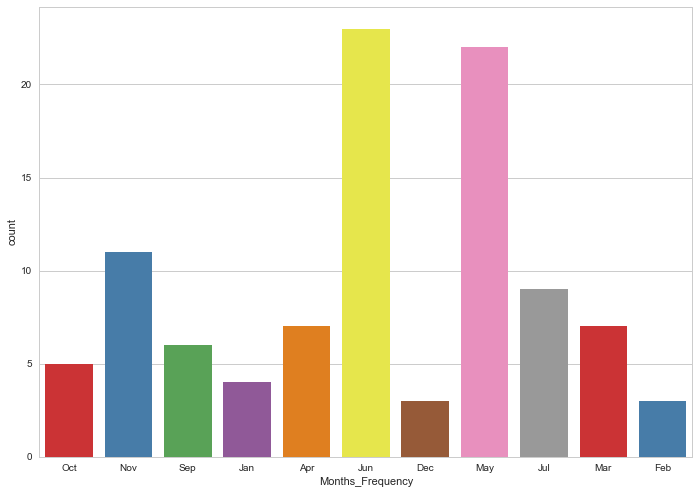

In [19]:
test=movies.sort_values('Profit', ascending=False)          #We sort the movies according to their earned profit
test['Month'] = pd.DatetimeIndex(test['Release_Date']).month#We know consider the month of release of each movie
import calendar
test['Month'] = test['Month'].apply(lambda x: calendar.month_abbr[x])
test['Month'].head(100)
test['Months_Frequency'] = test['Month'].head(100)
test['Months_Frequency'].value_counts()                     #Here we count the frequency of the most profitable movie released in various months
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(x ="Months_Frequency", data=test,palette="Set1")#We plot a figure,in order to visualize the analyzed data.

 ### <span style="color:Blue"> From the above analysis we can see that the month of JUNE and may have lead to the release of most profitable movies.Also the months of december,jan and feb are not too suitable to release a movie.

In [20]:
movies

,Budget,Genres,Website,MovieID,Keywords,Original_Language,Title,Overview,Popularity,Production_Houses,Production_Countries,Release_Date,Revenue,Runtime,Movie_Status,Tagline,Movie_Name,Average_Vote,Vote_Count,Profit
0,74000000,Family,http://www.minionsmovie.com/,211672,"assistant, aftercreditsstinger, duringcreditss...",EN,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875,"Universal Pictures , Illumination Entertainment",USUnited States of America,17/06/2015,1156730962,91,Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,1082730962
1,165000000,Adventure,http://www.interstellarmovie.net/,157336,"saving the world, artificial intelligence, fat...",EN,Interstellar,Interstellar chronicles the adventures of a gr...,724,"Paramount Pictures , Legendary Pictures , Warn...","CACanada , USUnited States of America , GBUnit...",05/11/2014,675120017,169,Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,510120017
2,58000000,Action,http://www.foxmovies.com/movies/deadpool,293660,"anti hero, mercenary, marvel comic, superhero,...",EN,Deadpool,Deadpool tells the origin story of former Spec...,514,"Twentieth Century Fox Film Corporation , Marve...",USUnited States of America,09/02/2016,783112979,108,Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,725112979
3,170000000,Action,http://marvel.com/guardians,118340,"marvel comic, spaceship, space, outer space, o...",EN,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481,"Marvel Studios , Moving Picture Company (MPC) ...","GBUnited Kingdom , USUnited States of America",30/07/2014,773328629,121,Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,603328629
4,150000000,Action,http://www.madmaxmovie.com/,76341,"future, chase, post-apocalyptic, dystopia, aus...",EN,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434,"Village Roadshow Pictures , Kennedy Miller Pro...","AUAustralia , USUnited States of America",13/05/2015,378858340,120,Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,228858340
5,150000000,Action,http://www.jurassicworld.com/,135397,"monster, dna, tyrannosaurus rex, velociraptor,...",EN,Jurassic World,Twenty-two years after the events of Jurassic ...,418,"Universal Studios , Amblin Entertainment , Leg...",USUnited States of America,09/06/2015,1513528810,124,Released,The park is open.,Jurassic World,6.5,8662,1363528810
6,140000000,Adventure,http://disney.go.com/disneyvideos/liveaction/p...,22,"exotic island, blacksmith, east india trading ...",EN,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271,"Walt Disney Pictures , Jerry Bruckheimer Films",USUnited States of America,09/07/2003,655011224,143,Released,Prepare to be blown out of the water.,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,515011224
7,170000000,Science Fiction,http://www.dawnofapes.com/,119450,"leader, colony, post-apocalyptic, dystopia, fo...",EN,Dawn of the Planet of the Apes,A group of scientists in San Francisco struggl...,243,"Ingenious Media , Chernin Entertainment , TSG ...",USUnited States of America,26/06/2014,710644566,130,Released,One last chance for peace.,Dawn of the Planet of the Apes,7.3,4410,540644566
8,125000000,Science Fiction,http://www.thehungergames.movie/,131631,"resistance, post-apocalyptic, dystopia, war, s...",EN,The Hunger Games: Mockingjay - Part 1,Katniss Everdeen reluctantly becomes the symbo...,206,"Lionsgate , Color Force",USUnited States of America,18/11/2014,752100229,123,Released,Fire burns brighter in the darkness,The Hunger Games: Mockingjay - Part 1,6.6,5584,627100229
9,165000000,Adventure,http://movies.disney.com/big-hero-6,177572,"brother brother relationship, hero, talent, re...",EN,Big Hero 6,The special bond that develops between plus-si...,203,"Walt Disney Pictures , Walt Disney Animation S...",USUnited States of America,24/10/2014,652105443,102,Released,From the

## <span style="color:Orange">Which movies have been most succesfull in the last five years? </span>

### <span style="color:Maroon">Below is an analysis,to decipher which movies have been most succesfull in the last five years.The features which will be taken for this consideration are the budget,revenue and profit generated by the movies

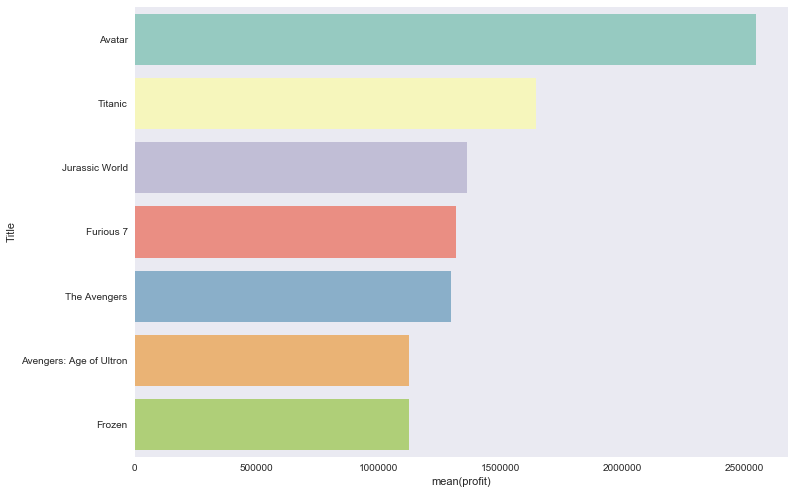

In [21]:
movies1=movies
movies1=movies1.nlargest(7, 'Profit')#Here we consider the top movies,based on the profit earned
movies1['budget']=movies['Budget']/1000
movies1['revenue']=movies['Revenue']/1000
movies1['profit']=movies['Profit']/1000
sns.set_style("dark")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.barplot(x="profit", y="Title", data=movies1,palette="Set3")#We plot a graph of the profit earned by each movie along with its title


## <span style="color:Orange"> Movie Ratings?

### <span style="color:Maroon"> The votes a movies receives from an audience contributes to a large extent in deciding if the movie has done well or not. In our analysis, we have computed the average vote for all the movies. 

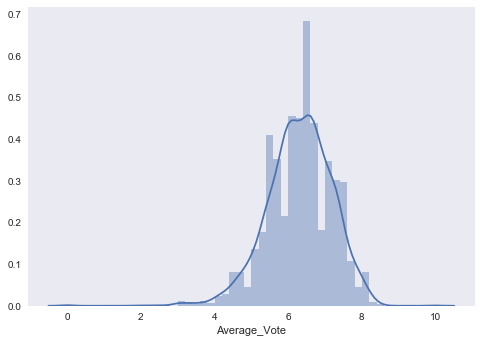

In [22]:
sns.distplot(movies['Average_Vote'].fillna(movies['Average_Vote'].median()))
plt.show()

### <span style="color:Blue">The result obtained is that, majority of the movies have an average out of 7.

###  <span style="color:Orange"> K-Means Clustering to understand the relation between Popularity vs Vote-count

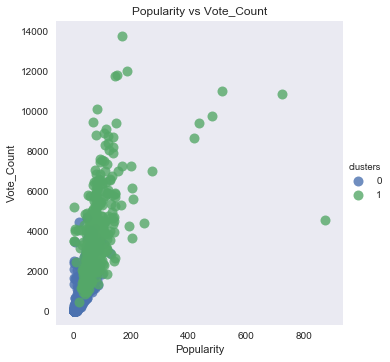

In [23]:
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns

df = movies

#Make a copy of DF
df_tr = df
df_tr['budget']=df_tr['Budget']/10000
df_tr['revenue']=df_tr['Revenue']/10000

#Transsform the timeOfDay to dummies
#df_tr = pd.get_dummies(df_tr, columns=['timeOfDay'])

#Standardize
clmns = ['budget', 'revenue','Popularity', 'Vote_Count']
df_tr_std = stats.zscore(df_tr[clmns])

#Cluster the data
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to originaal data
df_tr['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
df_tr[clmns].groupby(['clusters']).mean()

#Scatter plot of Wattage and Duration
sns.lmplot('Popularity', 'Vote_Count', 
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Popularity vs Vote_Count')
plt.xlabel('Popularity')
plt.ylabel('Vote_Count')


In [24]:
import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline



C:\Users\Karan Kanwal\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### <span style="color:Maroon"> Our below analysis,involves analyzing and visualizing the popularity of a movie with respect the votes it has received by a general spectrum of public

In [25]:
#we first consider the numeric data of our dataset and transfer into a new dataset for simplicities of the operations to be performed.
movies2=movies._get_numeric_data()
movies

,Budget,Genres,Website,MovieID,Keywords,Original_Language,Title,Overview,Popularity,Production_Houses,...,Runtime,Movie_Status,Tagline,Movie_Name,Average_Vote,Vote_Count,Profit,budget,revenue,clusters
0,74000000,Family,http://www.minionsmovie.com/,211672,"assistant, aftercreditsstinger, duringcreditss...",EN,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875,"Universal Pictures , Illumination Entertainment",...,91,Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,1082730962,7400.0000,115673.0962,1
1,165000000,Adventure,http://www.interstellarmovie.net/,157336,"saving the world, artificial intelligence, fat...",EN,Interstellar,Interstellar chronicles the adventures of a gr...,724,"Paramount Pictures , Legendary Pictures , Warn...",...,169,Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,510120017,16500.0000,67512.0017,1
2,58000000,Action,http://www.foxmovies.com/movies/deadpool,293660,"anti hero, mercenary, marvel comic, superhero,...",EN,Deadpool,Deadpool tells the origin story of former Spec...,514,"Twentieth Century Fox Film Corporation , Marve...",...,108,Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,725112979,5800.0000,78311.2979,1
3,170000000,Action,http://marvel.com/guardians,118340,"marvel comic, spaceship, space, outer space, o...",EN,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481,"Marvel Studios , Moving Picture Company (MPC) ...",...,121,Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,603328629,17000.0000,77332.8629,1
4,150000000,Action,http://www.madmaxmovie.com/,76341,"future, chase, post-apocalyptic, dystopia, aus...",EN,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434,"Village Roadshow Pictures , Kennedy Miller Pro...",...,120,Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,228858340,15000.0000,37885.8340,1
5,150000000,Action,http://www.jurassicworld.com/,135397,"monster, dna, tyrannosaurus rex, velociraptor,...",EN,Jurassic World,Twenty-two years after the events of Jurassic ...,418,"Universal Studios , Amblin Entertainment , Leg...",...,124,Released,The park is open.,Jurassic World,6.5,8662,1363528810,15000.0000,151352.8810,1
6,140000000,Adventure,http://disney.go.com/disneyvideos/liveaction/p...,22,"exotic island, blacksmith, east india trading ...",EN,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271,"Walt Disney Pictures , Jerry Bruckheimer Films",...,143,Released,Prepare to be blown out of the water.,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,515011224,14000.0000,65501.1224,1
7,170000000,Science Fiction,http://www.dawnofapes.com/,119450,"leader, colony, post-apocalyptic, dystopia, fo...",EN,Dawn of the Planet of the Apes,A group of scientists in San Francisco struggl...,243,"Ingenious Media , Chernin Entertainment , TSG ...",...,130,Released,One last chance for peace.,Dawn of the Planet of the Apes,7.3,4410,540644566,17000.0000,71064.4566,1
8,125000000,Science Fiction,http://www.thehungergames.movie/,131631,"resistance, post-apocalyptic, dystopia, war, s...",EN,The Hunger Games: Mockingjay - Part 1,Katniss Everdeen reluctantly becomes the symbo...,206,"Lionsgate , Color Force",...,123,Released,Fire burns brighter in the darkness,The Hunger Games: Mockingjay - Part 1,6.6,5584,627100229,12500.0000,75210.0229,1
9,165000000,Adventure,http://movies.disney.com/big-hero-6,177572,"brother brother relationship, hero, talent, re...",EN,Big Hero 6,The special bond that develops between plus-si...,203,"Walt Disney Pictures , Walt Disney Animation S...",...,102,Released,From the creators of Wreck-it Ralph and Frozen,Big Hero 6,7.8,6135,487105443,16500.0000,65210.5443,1


In [26]:
#We now create bins or groups of average vote.
cut1 = pd.cut(movies2.Average_Vote, [0,2,3,4,8,10],labels=['0-2','2-4','4-6','6-8','8-10'])
movies2['Average_Vote'] =cut1


,Budget,Genres,Website,MovieID,Keywords,Original_Language,Title,Overview,Popularity,Production_Houses,...,Runtime,Movie_Status,Tagline,Movie_Name,Average_Vote,Vote_Count,Profit,budget,revenue,clusters
0,74000000,Family,http://www.minionsmovie.com/,211672,"assistant, aftercreditsstinger, duringcreditss...",EN,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875,"Universal Pictures , Illumination Entertainment",...,91,Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,1082730962,7400.0000,115673.0962,1
1,165000000,Adventure,http://www.interstellarmovie.net/,157336,"saving the world, artificial intelligence, fat...",EN,Interstellar,Interstellar chronicles the adventures of a gr...,724,"Paramount Pictures , Legendary Pictures , Warn...",...,169,Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,510120017,16500.0000,67512.0017,1
2,58000000,Action,http://www.foxmovies.com/movies/deadpool,293660,"anti hero, mercenary, marvel comic, superhero,...",EN,Deadpool,Deadpool tells the origin story of former Spec...,514,"Twentieth Century Fox Film Corporation , Marve...",...,108,Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,725112979,5800.0000,78311.2979,1
3,170000000,Action,http://marvel.com/guardians,118340,"marvel comic, spaceship, space, outer space, o...",EN,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481,"Marvel Studios , Moving Picture Company (MPC) ...",...,121,Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,603328629,17000.0000,77332.8629,1
4,150000000,Action,http://www.madmaxmovie.com/,76341,"future, chase, post-apocalyptic, dystopia, aus...",EN,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434,"Village Roadshow Pictures , Kennedy Miller Pro...",...,120,Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,228858340,15000.0000,37885.8340,1
5,150000000,Action,http://www.jurassicworld.com/,135397,"monster, dna, tyrannosaurus rex, velociraptor,...",EN,Jurassic World,Twenty-two years after the events of Jurassic ...,418,"Universal Studios , Amblin Entertainment , Leg...",...,124,Released,The park is open.,Jurassic World,6.5,8662,1363528810,15000.0000,151352.8810,1
6,140000000,Adventure,http://disney.go.com/disneyvideos/liveaction/p...,22,"exotic island, blacksmith, east india trading ...",EN,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271,"Walt Disney Pictures , Jerry Bruckheimer Films",...,143,Released,Prepare to be blown out of the water.,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,515011224,14000.0000,65501.1224,1
7,170000000,Science Fiction,http://www.dawnofapes.com/,119450,"leader, colony, post-apocalyptic, dystopia, fo...",EN,Dawn of the Planet of the Apes,A group of scientists in San Francisco struggl...,243,"Ingenious Media , Chernin Entertainment , TSG ...",...,130,Released,One last chance for peace.,Dawn of the Planet of the Apes,7.3,4410,540644566,17000.0000,71064.4566,1
8,125000000,Science Fiction,http://www.thehungergames.movie/,131631,"resistance, post-apocalyptic, dystopia, war, s...",EN,The Hunger Games: Mockingjay - Part 1,Katniss Everdeen reluctantly becomes the symbo...,206,"Lionsgate , Color Force",...,123,Released,Fire burns brighter in the darkness,The Hunger Games: Mockingjay - Part 1,6.6,5584,627100229,12500.0000,75210.0229,1
9,165000000,Adventure,http://movies.disney.com/big-hero-6,177572,"brother brother relationship, hero, talent, re...",EN,Big Hero 6,The special bond that develops between plus-si...,203,"Walt Disney Pictures , Walt Disney Animation S...",...,102,Released,From the creators of Wreck-it Ralph and Frozen,Big Hero 6,7.8,6135,487105443,16500.0000,65210.5443,1


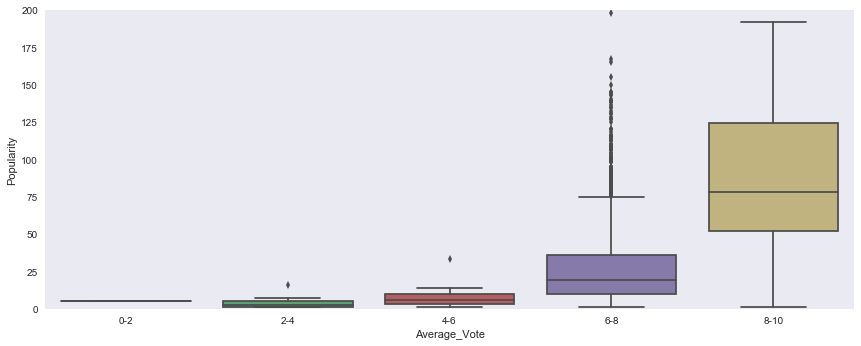

In [27]:
#We now create graphs depicting the relationships between the average vote  and popularity.
sns.boxplot(data=movies2,x='Average_Vote',y='Popularity')
plt.ylim(0,200)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 5.5)
movies

### <span style="color:Maroon">Our next analysis,consists of analyzing which is the optimal time with respect to the duration of a movie. Certain movies can be too lengthy for a user,while some might finish in no time. We try and analyze the perfect duration of a movie,which will enable directors and producers to plan the duration of the movie, that increases their chances of getting maximum profit.

In [28]:
cut = pd.cut(movies.Runtime,[0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400],labels=['0-20','20-40','40-60','60-80','80-100','100-120','120-140','160-180','180-200','200-220','220-240','240-260','260-280','280-300','300-320','320-340','340-360','360-380','380-400','400-420'])

In [29]:
movies['Bin']= cut
movies

,Budget,Genres,Website,MovieID,Keywords,Original_Language,Title,Overview,Popularity,Production_Houses,...,Movie_Status,Tagline,Movie_Name,Average_Vote,Vote_Count,Profit,budget,revenue,clusters,Bin
0,74000000,Family,http://www.minionsmovie.com/,211672,"assistant, aftercreditsstinger, duringcreditss...",EN,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875,"Universal Pictures , Illumination Entertainment",...,Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,1082730962,7400.0000,115673.0962,1,80-100
1,165000000,Adventure,http://www.interstellarmovie.net/,157336,"saving the world, artificial intelligence, fat...",EN,Interstellar,Interstellar chronicles the adventures of a gr...,724,"Paramount Pictures , Legendary Pictures , Warn...",...,Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,510120017,16500.0000,67512.0017,1,180-200
2,58000000,Action,http://www.foxmovies.com/movies/deadpool,293660,"anti hero, mercenary, marvel comic, superhero,...",EN,Deadpool,Deadpool tells the origin story of former Spec...,514,"Twentieth Century Fox Film Corporation , Marve...",...,Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,725112979,5800.0000,78311.2979,1,100-120
3,170000000,Action,http://marvel.com/guardians,118340,"marvel comic, spaceship, space, outer space, o...",EN,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481,"Marvel Studios , Moving Picture Company (MPC) ...",...,Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,603328629,17000.0000,77332.8629,1,120-140
4,150000000,Action,http://www.madmaxmovie.com/,76341,"future, chase, post-apocalyptic, dystopia, aus...",EN,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434,"Village Roadshow Pictures , Kennedy Miller Pro...",...,Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,228858340,15000.0000,37885.8340,1,100-120
5,150000000,Action,http://www.jurassicworld.com/,135397,"monster, dna, tyrannosaurus rex, velociraptor,...",EN,Jurassic World,Twenty-two years after the events of Jurassic ...,418,"Universal Studios , Amblin Entertainment , Leg...",...,Released,The park is open.,Jurassic World,6.5,8662,1363528810,15000.0000,151352.8810,1,120-140
6,140000000,Adventure,http://disney.go.com/disneyvideos/liveaction/p...,22,"exotic island, blacksmith, east india trading ...",EN,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271,"Walt Disney Pictures , Jerry Bruckheimer Films",...,Released,Prepare to be blown out of the water.,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,515011224,14000.0000,65501.1224,1,160-180
7,170000000,Science Fiction,http://www.dawnofapes.com/,119450,"leader, colony, post-apocalyptic, dystopia, fo...",EN,Dawn of the Planet of the Apes,A group of scientists in San Francisco struggl...,243,"Ingenious Media , Chernin Entertainment , TSG ...",...,Released,One last chance for peace.,Dawn of the Planet of the Apes,7.3,4410,540644566,17000.0000,71064.4566,1,120-140
8,125000000,Science Fiction,http://www.thehungergames.movie/,131631,"resistance, post-apocalyptic, dystopia, war, s...",EN,The Hunger Games: Mockingjay - Part 1,Katniss Everdeen reluctantly becomes the symbo...,206,"Lionsgate , Color Force",...,Released,Fire burns brighter in the darkness,The Hunger Games: Mockingjay - Part 1,6.6,5584,627100229,12500.0000,75210.0229,1,120-140
9,165000000,Adventure,http://movies.disney.com/big-hero-6,177572,"brother brother relationship, hero, talent, re...",EN,Big Hero 6,The special bond that develops between plus-si...,203,"Walt Disney Pictures , Walt Disney Animation S...",...,Released,From the creators of Wreck-it Ralph and Frozen,Big Hero 6,7.8,6135,487105443,16500.0000,65210.5443,1,100-120


## <span style="color:Orange"> What is the optimal movie runtime? 

### <span style="color:Maroon">The optimal movie runtime will enable directors and producers to plan the duration of the movie , that increases their chances of getting maximum profit. Certain movies can be too lengthy for a user, while some might finish in no time.


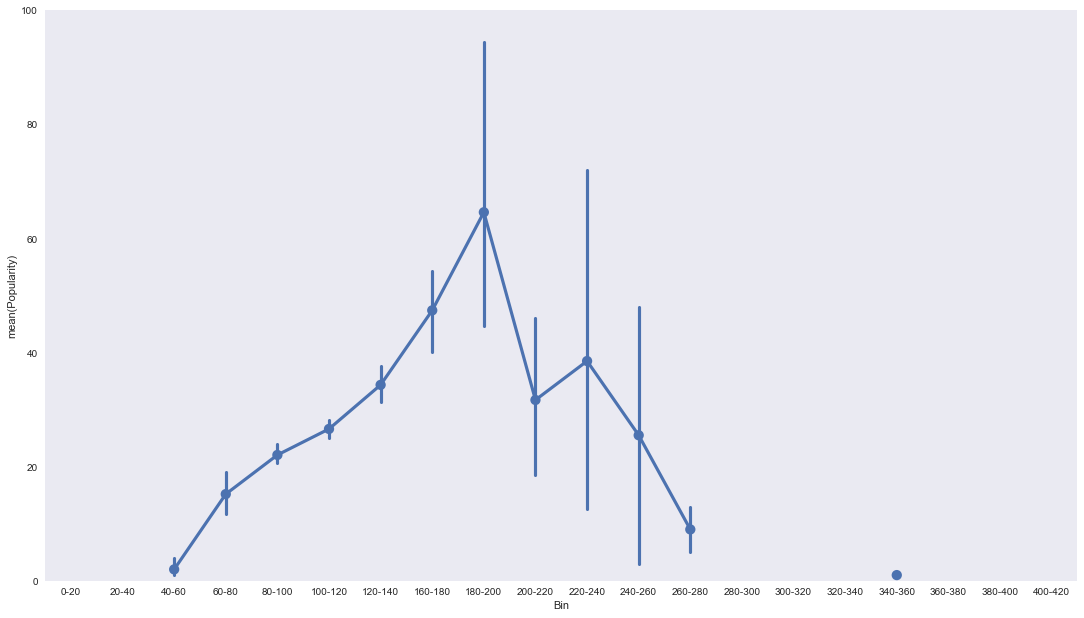

In [30]:
#We create a graph depicting the optimal duration of a movie,with respect to our past dataset.
import matplotlib.pyplot as plt
fig,ax =plt.subplots()
fig.set_size_inches(18.5,10.5)
plt.ylim(0,100)
#sns.violinplot(x="bin", y="popularity", data=movies)
sns.pointplot(x='Bin',y='Popularity',data=movies)

plt.show()

### <span style="color:blue"> From the above analysis,we can see that 180-200 is the most optimal duration to gain profits. Thus if a movie runs for this particular range duration,the more chances of it being successful,in comparison to movies of other durations 

In [31]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Revenue ~ Runtime', data=movies).fit()

# print the coefficients
lm.params




Intercept   -1.080529e+08
Runtime      2.038969e+06
dtype: float64

In [32]:
X_new = pd.DataFrame({'Runtime': [180]})
X_new.head()

,Runtime
0,180


In [33]:
lm.predict(X_new)

0    2.589615e+08
dtype: float64

## <span style="color:Orange"> Most Popular Movies are of which genre?

### <span style="color:Maroon"> The genre or type of movie,plays a big role in the outcome of a movie.Certain movies of a certain genre are more liked by the public,and certain movies of unique and distinct genres tend to not do very well. We analyze that which genres make a movie click,and lead to greater profits. We analyze our datset and extrapolate which genres have lead to the most profitable movies. This analysis can give producers and directors an insight of what type of movies,should they be looking to make.

In [37]:

df3=movies[movies['Profit'] > 0]
demo=df3['Genres'].value_counts()
demo


 Drama              567
 Comedy             525
 Action             444
 Adventure          234
 Horror             182
 Crime              108
 Thriller            93
 Animation           83
 Fantasy             83
 Science Fiction     67
 Romance             60
 Family              31
 Documentary         27
 Mystery             21
 Western             20
 Music               15
 History             15
 War                 10
Name: Genres, dtype: int64

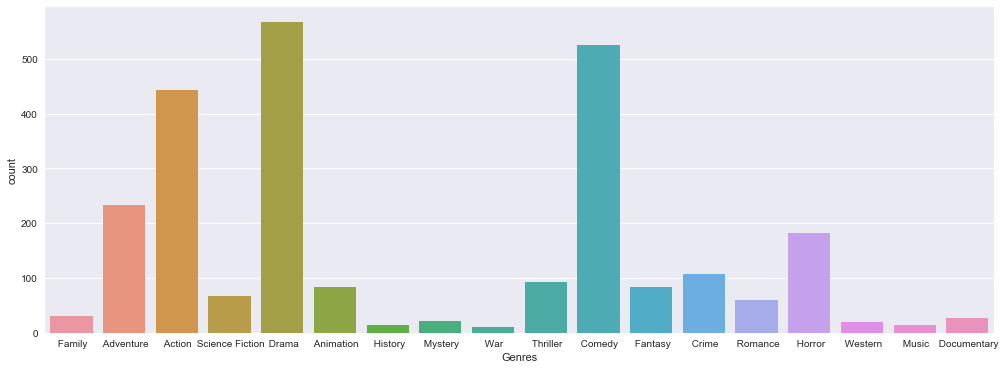

In [38]:
#Below we depict a graph of the movies,their genre and their count with respect to only the movies that have made profit.
sns.set(style="darkgrid")
plt.figure(figsize=(17,6))
ax = sns.countplot(x="Genres", data=df3)

### <span style="color:Blue">We can see above from our analysis,that comedy,drama and action movies tend to do relatively better,i.e more profit. Whereas movies such as war,musicals and western ones do not tend to do that well.

## <span style="color:Orange"> Which Production house has the most number of successful movies under it's banner?

### <span style="color:Maroon">The production house of a movie contributes to a great extent in order to make a movie succesful.In our dataset we have analyzed the most popular datasets,in terms of revenue generated.This will help us analyze which banners have been successful over the years.

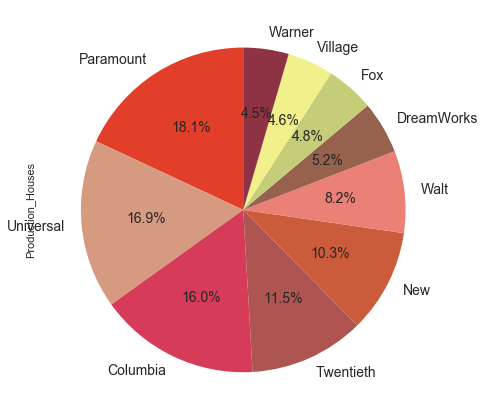

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
count = movies['Production_Houses'].str.split().str.get(0).value_counts()
count=count.head(10)
plt.figure(figsize=(16,8))
# plot chart
#colors = ['#8B475D', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA', '#00C69C', '#00E28E', '#00FF80', ] 
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E" ,"#C6CD78","#F1F08A","#8E3343"]
ax1 = plt.subplot(121, aspect='equal')
count.plot(kind='pie', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=14,colors=colors)


### <span style="color:Green"> In our analysis we have extrapolated that production houses such as paramount,universal and columbia have been the powerhouses over the years,and majority of movies released under these production houses,have lead to maximum profit.

### <span style="color:Orange">Performing Correlation to identify how the different factors affect the popularity of a movie

In [34]:
import pandas
import statsmodels.api as sm
from statsmodels.formula.api import ols

print (movies.corr())

model = ols("Profit ~ Revenue + Runtime + Popularity + Vote_Count + Average_Vote", data=movies).fit()
print (model.params)
print (model.summary())

                Budget   MovieID  Popularity   Revenue   Runtime  \
Budget        1.000000  0.004386    0.439527  0.708173  0.233017   
MovieID       0.004386  1.000000    0.171306  0.023865 -0.034260   
Popularity    0.439527  0.171306    1.000000  0.605638  0.184251   
Revenue       0.708173  0.023865    0.605638  1.000000  0.233722   
Runtime       0.233017 -0.034260    0.184251  0.233722  1.000000   
Average_Vote -0.029460 -0.064895    0.278886  0.180296  0.369127   
Vote_Count    0.547564  0.100422    0.752036  0.758307  0.258027   
Profit        0.551892  0.026939    0.590266  0.979612  0.209750   
budget        1.000000  0.004386    0.439527  0.708173  0.233017   
revenue       0.708173  0.023865    0.605638  1.000000  0.233722   
clusters      0.661700  0.064166    0.561641  0.737584  0.195724   

              Average_Vote  Vote_Count    Profit    budget   revenue  clusters  
Budget           -0.029460    0.547564  0.551892  1.000000  0.708173  0.661700  
MovieID          -0.0

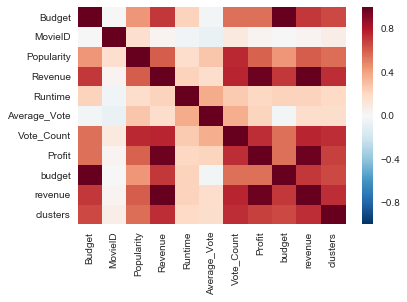

In [35]:
# Calculate correlations
corr = movies.corr()
sns.heatmap(corr)

## <span style="color:Orange"> Correlation matrix and heatmap

### <span style="color:Maroon">To analyze how the various features contribute a movie such as revenue, runtime, vote count, popularity are correlated, we have built a correlation matrix and the heatmap

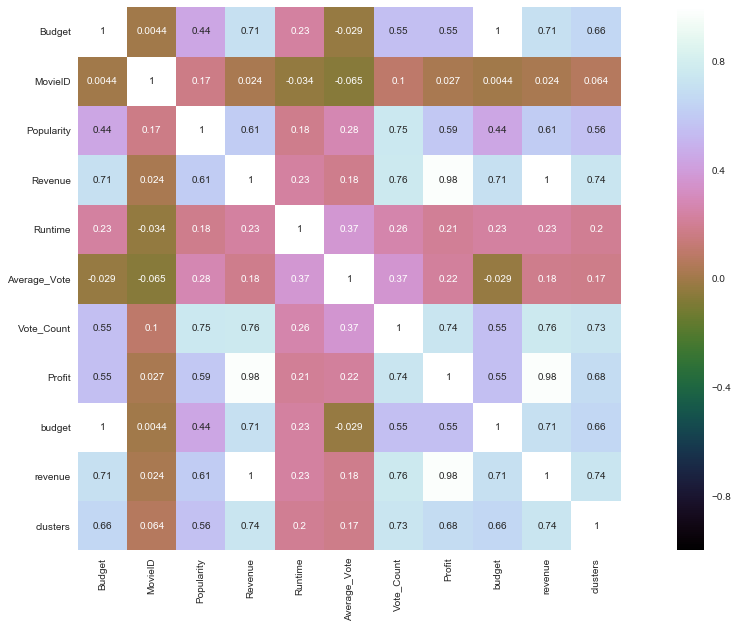

In [36]:
corr_mat=movies.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

### <span style="color:Blue"> From our analysis we see Positively correlated variables to Profit- Vote count : 74% Popularity : 59% Positively correlated variables to Popularity:Budget : 44%


In [40]:
test1 = movies[['Revenue','Profit','Runtime','Popularity','Vote_Count','Average_Vote']].copy()


In [41]:
test1=test1.sort_values('Profit', ascending=False)
test1['Month']=test['Month']

(50, 150)

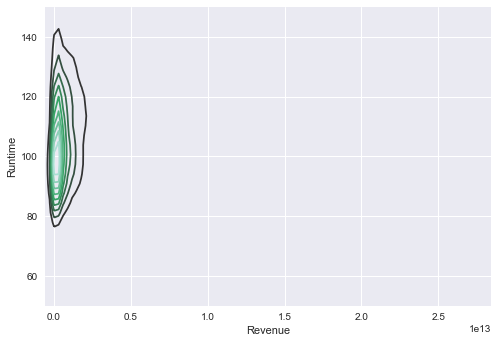

In [42]:

test1['Revenue']=test1['Revenue']*10000
sns.kdeplot(test1.Revenue, test1.Runtime)
plt.ylim(50,150)


## <span style="color:Maroon">Lets Apply PCA inorder to demcompose number of features.</span>##

In [43]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in movies.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)          
num_list = movies.columns.difference(str_list)  
X=movies[num_list]
X.shape

(3375, 11)

### <span style="color:Green">Now we will Check How many components we should incorporate in order to Apply PCA </span>

<Container object of 11 artists>

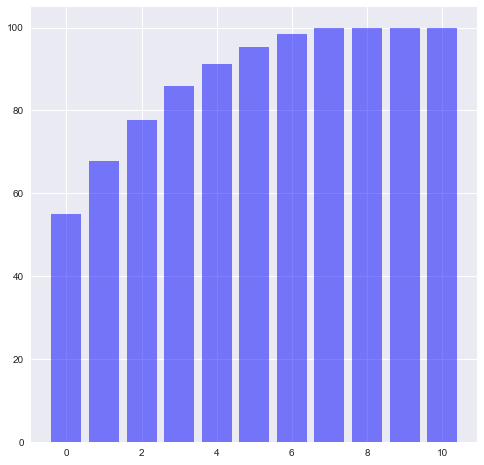

In [44]:

from sklearn.preprocessing import StandardScaler
X_standard = StandardScaler().fit_transform(X)


from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=11)
Y_sklearn = sklearn_pca.fit_transform(X_standard)

cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

sklearn_pca.explained_variance_ratio_[:10].sum()

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(11), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)

### <span style="color:Maroon">We will take total 7 features to explain the model ,which accounts total 90% of our varaince. Therefore we will take only 7 components in our mode to explain it.Thus we get our profit in primarily 5 clusters</span>

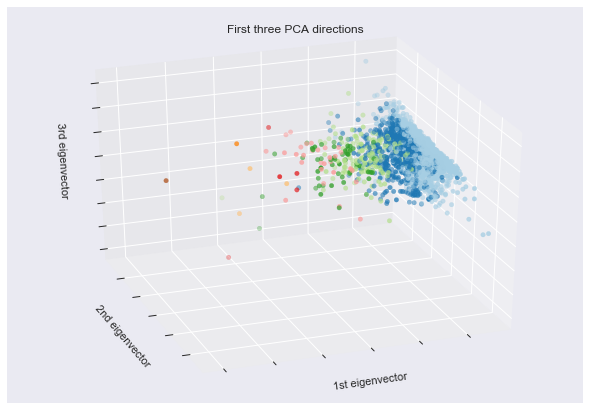

In [49]:

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
X_red  = sklearn_pca.fit_transform(X_standard)
P=movies['Profit']
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_red[:, 0], X_red[:, 1], X_red[:, 2], c=P,cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## <span style="color:Orange"> Profit VS Runtime

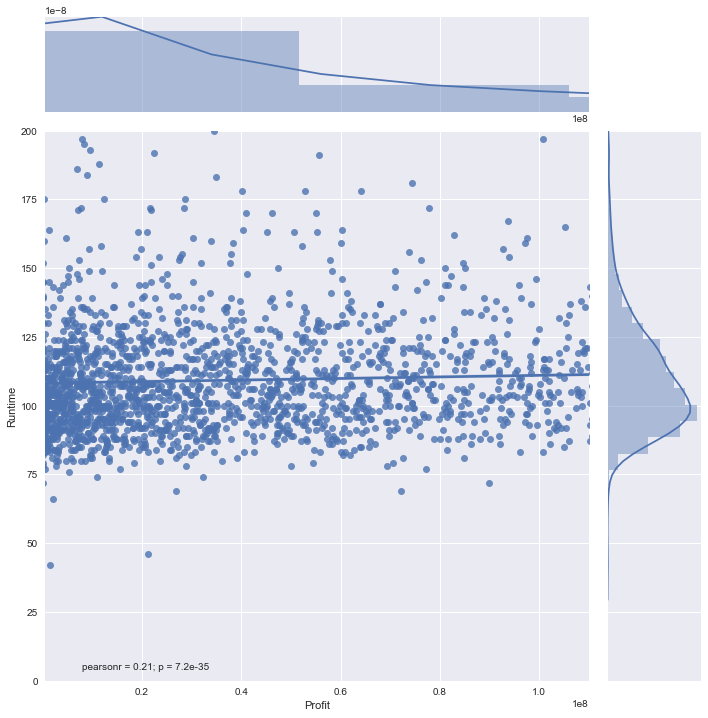

In [50]:
h = sns.jointplot(x="Profit", y="Runtime",kind='reg',size=10,xlim=[500000,110000000],ylim = [0,200],data=movies)

# <span style="color:Green"> CONCLUSION: The goal of analyzing this dataset was to successfully figure out which attributes are the most significant when determining future success of a movie title before it is released. Critics and human instinct, when it comes to movies, is some times unreliable.This analyzation pertains to the entertainment/movie industry. It can help producers, actors, directors, film investors, and movie-goers determine how successful the proposed movie will be. Putting our dataset and its attributes it in terms of analytical processing makes the prediction more stable and unbiased.
